In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import MultipleLocator
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report,f1_score,precision_recall_curve,roc_curve, roc_auc_score,confusion_matrix, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from collections import Counter

# Data Cleaning

In [2]:
df = pd.read_csv('Data2015_2016.csv')

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

SEQN                        0
Age                         0
 Body_Mass_Index            0
Gender                      0
Physical_Activity           0
Total_Caffeine              0
Food_Security               0
Count_Meds                  0
Section_I                   0
Section_H                   0
Diabetes                    0
Race_and_Ethnicity          0
Total_Sodium_Intake         0
Diastolic_Blood_Pressure    0
Systolic_Blood_Pressure     0
dtype: int64

In [5]:
data2015_2016 = df.loc[~((df['Diastolic_Blood_Pressure'] == 0) | (df['Systolic_Blood_Pressure'] == 0))]
data2015_2016

,SEQN,Age,Body_Mass_Index,Gender,Physical_Activity,Total_Caffeine,Food_Security,Count_Meds,Section_I,Section_H,Diabetes,Race_and_Ethnicity,Total_Sodium_Intake,Diastolic_Blood_Pressure,Systolic_Blood_Pressure
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,93696,26,33.8,1,0,0,2,1,0,0,2,0,0,68,118
9538,93697,80,31.0,2,2,13,2,4,0,0,2,0,0,56,154
9541,93700,35,26.0,1,0,0,2,2,0,0,2,0,0,62,104
9542,93701,8,18.1,1,0,5,2,1,0,0,2,0,0,48,114


In [6]:
data2015_2016.to_csv("Data2015_2016_clean.csv", index = False)

#  Label the Target Category

In [7]:
data2015_2016['Sy_Label'] = pd.cut(x=data2015_2016['Systolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['0', '1'])

In [8]:
data2015_2016['Da_Label'] = pd.cut(x=data2015_2016['Diastolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['0', '1'])

# Combine Systolic and Diastolic Pressure¶ 

In [9]:
class_list = []
for sys, dia in zip(data2015_2016["Sy_Label"],data2015_2016["Da_Label"]):
    if int(sys) + int(dia) >0:
        class_list.append(1)
    else:
        class_list.append(0)
        

In [10]:
data2015_2016["target"] = class_list

# Split X and Y

In [11]:
X = data2015_2016.drop(["Diastolic_Blood_Pressure","Systolic_Blood_Pressure","Sy_Label","Da_Label","SEQN"], axis=1)
y = data2015_2016["target"].values
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Find the Optimal K_Cross Validation

In [13]:
k_list = list(range(1,30,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

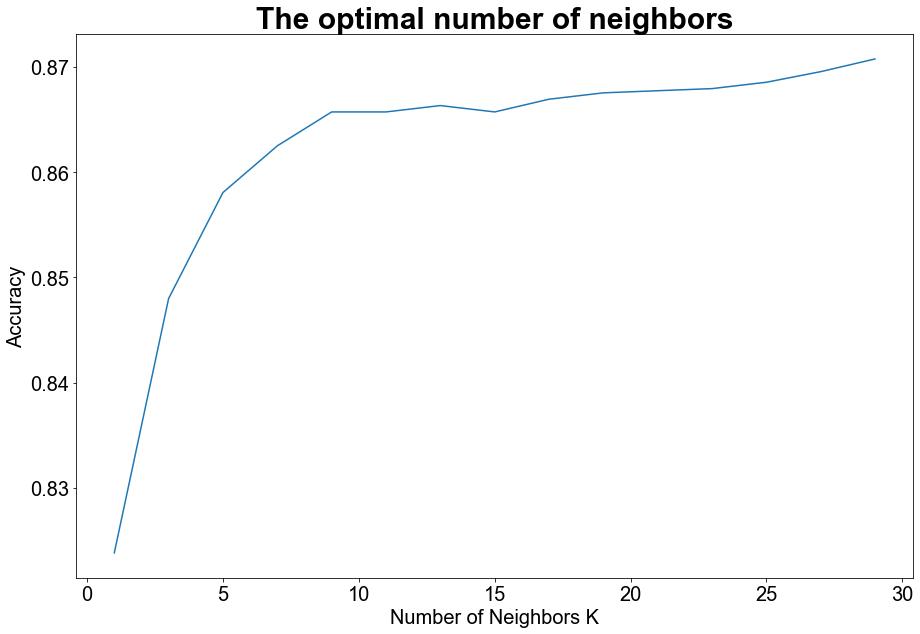

In [14]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=30, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize = 20)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

In [15]:
# Double Check with whole data 

k_range = range(1,31)
k_error = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(KNN, X, y, cv=8, scoring='accuracy')
    a = scores.mean()
    random_state = 42
    print(a)
    k_error.append(1-a)

0.8186823277346291
0.8618610590350844
0.8477503156444887
0.8663754128884978
0.8603086620499675
0.8689150756909108
0.8652465853005318
0.867927172207981
0.8646812947163025
0.8691980398158421
0.8665168152427594
0.8686332274808382
0.8676454834143169
0.8696211309637678
0.8686338651464718
0.868773992169466
0.8680692122278761
0.8683502633559067
0.8675039216436469
0.8675034433944218
0.8670800334136792
0.8684910280445346
0.8677857698537195
0.870184827383913
0.869196764484575
0.8703255920725408
0.8690556809631302
0.8696206527145427
0.8686327492316129
0.8699031385902489


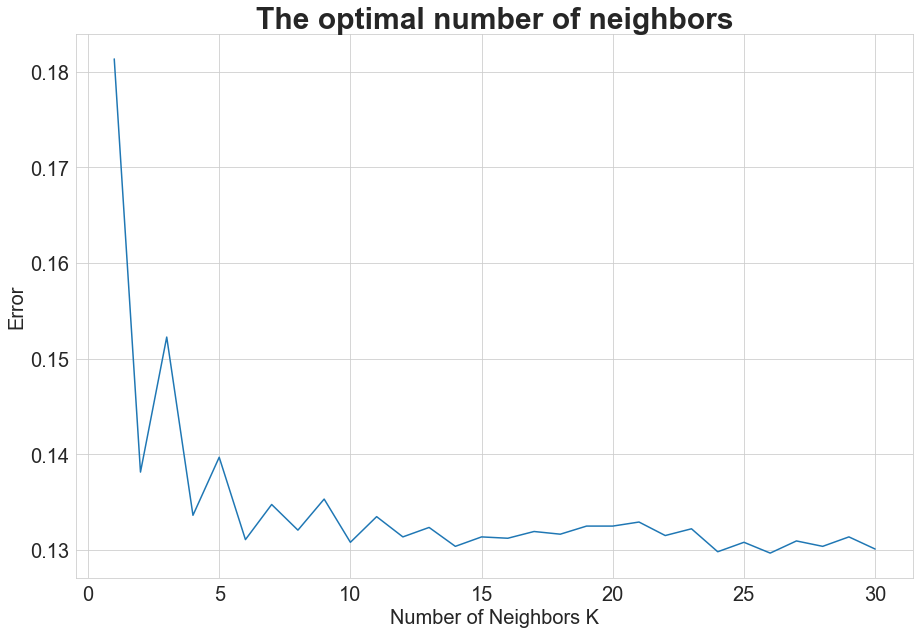

In [16]:
plt.figure(figsize=(15,10))
plt.plot(k_range,k_error)
plt.xlabel('Number of Neighbors K', size = 20)
plt.ylabel('Error', size = 20)
plt.title('The optimal number of neighbors',fontsize=30, fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize = 20)
sns.set_style("whitegrid")
plt.show()

In this regard,the optimal K will be 5

# Define the Confusion Matrxi and Roc Curve Function

In [17]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots(figsize = (10,8))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g',annot_kws={"fontsize":18})
    ax.xaxis.set_label_position('top')
    
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=30)
    plt.ylabel('True',fontsize=20)
    plt.xlabel('Prediction',fontsize=20)
    plt.show()

In [18]:
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.ylabel('TP rate',fontsize=20)
    plt.xlabel('FP rate',fontsize=20)
    plt.title('ROC Curve for KNN Model',fontsize=25)
    plt.show()

# KNN model with the optimal K  = 5

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 86.08%


In [21]:
Conf_matrix = confusion_matrix(y_test, y_pred)
print(Conf_matrix)

[[1785   77]
 [ 219   46]]


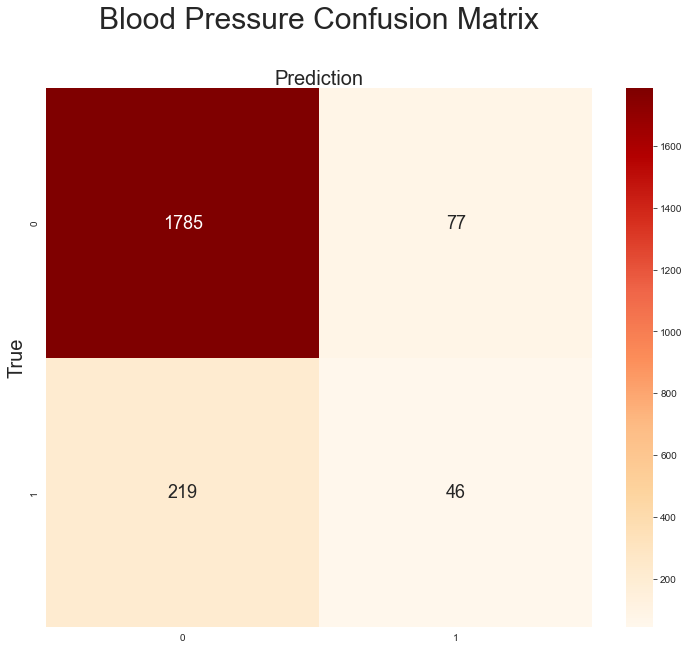

In [22]:
plot_cnf_matirx(Conf_matrix,'Blood Pressure Confusion Matrix')

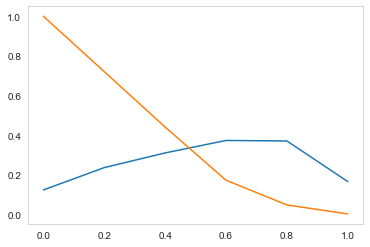

In [23]:
y_pred = classifier.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

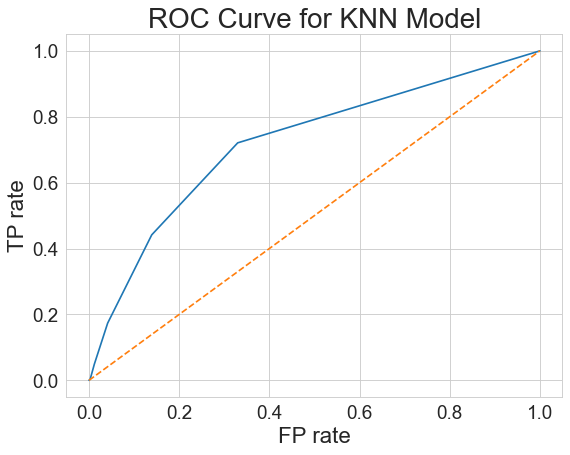

In [24]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fprs,tprs)

In [25]:
roc_auc_score(y_test,y_pred)

0.7210566848387816

# KNN with the Best Parameter

In [26]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[5,7,9]
    },
    {
        'weights':['distance'],
        'n_neighbors':[5,7,9],
        'p':[i for i in range(1,6)]
    }
]

In [27]:
knn_para = KNeighborsClassifier()
grid_search = GridSearchCV(knn_para,param_grid)
grid_search.fit(X_train,y_train)
y_pred_para =grid_search.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred_para)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 87.96%


In [29]:
Conf_matrix = confusion_matrix(y_test, y_pred_para)
print(Conf_matrix)

[[1829   33]
 [ 223   42]]


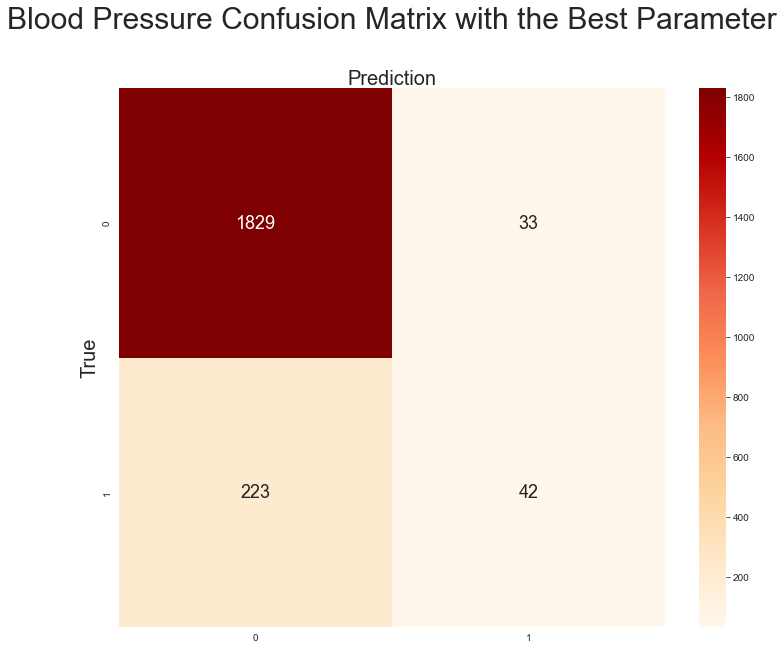

In [30]:
plot_cnf_matirx(Conf_matrix,'Blood Pressure Confusion Matrix with the Best Parameter')

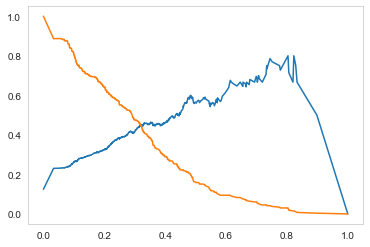

In [31]:
y_pred_para = grid_search.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_para)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

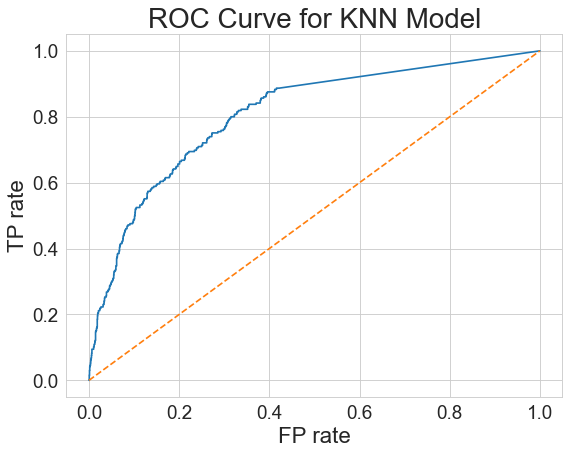

In [32]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred_para)
plot_roc_curve(fprs,tprs)

In [33]:
roc_auc_score(y_test,y_pred_para)

0.8078086050706281

#  Imbalanced Data - undersampling

In [34]:
data2015_2016.groupby(['target']).size()

target
0    6175
1     912
dtype: int64

In [35]:
undersampling = NearMiss(version = 2, n_neighbors = 5)
X,y = undersampling.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({0: 912, 1: 912})


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Revised KNN with Best Parameter & Resampled data

In [37]:
param_grid_imb = [
    {
        'weights':['uniform'],
        'n_neighbors':[5,7,9]
    },
    {
        'weights':['distance'],
        'n_neighbors':[5,7,9],
        'p':[i for i in range(1,6)]
    }
]

In [38]:
knn_para_imb = KNeighborsClassifier()
grid_search = GridSearchCV(knn_para_imb,param_grid_imb)
grid_search.fit(X_train,y_train)
y_pred_para_imb =grid_search.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred_para_imb)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 92.88%


In [40]:
Conf_matrix = confusion_matrix(y_test, y_pred_para_imb)
print(Conf_matrix)

[[267   2]
 [ 37 242]]


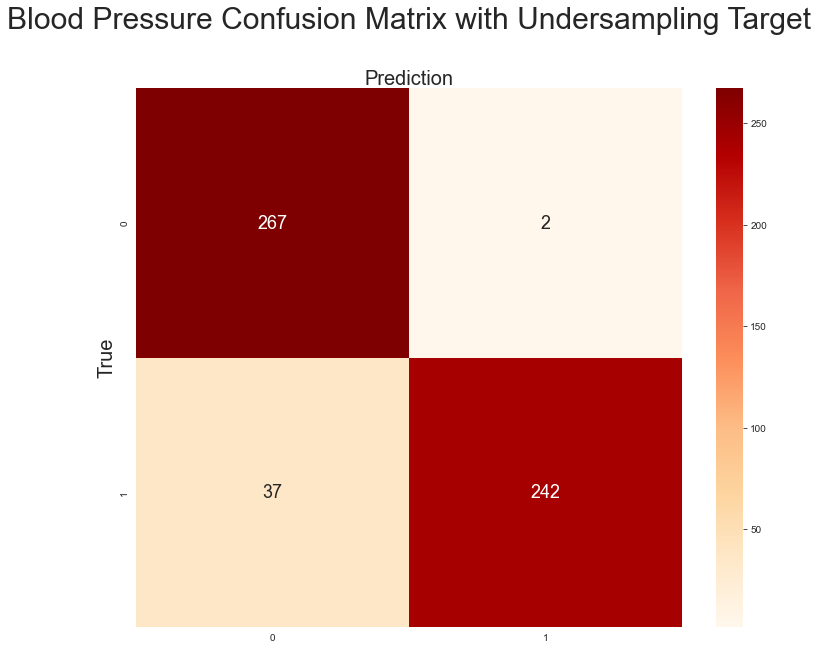

In [41]:
plot_cnf_matirx(Conf_matrix,'Blood Pressure Confusion Matrix with Undersampling Target')

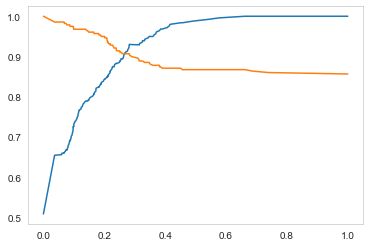

In [42]:
y_pred_para_imb = grid_search.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_para_imb)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

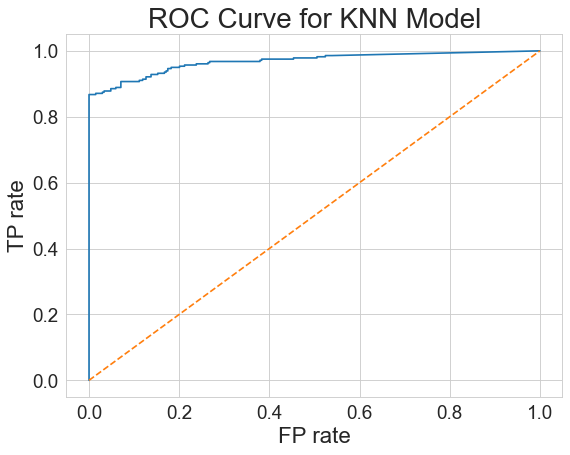

In [43]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred_para_imb)
plot_roc_curve(fprs,tprs)

In [44]:
roc_auc_score(y_test,y_pred_para_imb)

0.9681949607600165